# **Taller de Python**
Karen Alexandra Rojas Rincon

El siguiente conjunto de datos agronómicos permite usar la misma entrada para ajustar diferentes modelos haciendo uso esta vez del programa Python usando cualquier plataforma. 
La matriz de datos contiene las variables

**y:** latitud

**x:**Longitud

**SMI:**Índice de humedad del suelo

**NDVI:** Indice de vegetación de diferencia normalizado

**LST:** Temperatura en la superficie del suelo


1. Convertir el código R en Python para generar un data.frame de manera análoga

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import random as rd
import scipy as sc 
import folium

In [54]:
from dataclasses import replace
rd.seed(1233898696)
Seqlat = np.arange(-73.30, -73.25, 0.001)
Seqlong = np.arange(5.54, 5.58, 0.001)
Latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace= True)
Latitude = list(Latitude[0])
Longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace = True)
Longitude = list(Longitude[0])

##DataFrame 1
xy = pd.DataFrame({'Lat':Latitude, 'Lon':Longitude})

##DataFrame2
SMI= np.partition(np.random.uniform(0.7, 0.95, 100), 10)
NDVI = np.partition(np.random.uniform(0.45, 0.06, 100), 10)
LST = np.partition(26* sc.stats.beta.rvs(0.87, 0.91, size=100), 10)

XY2= pd.DataFrame({'V1':SMI, 'V2':NDVI, 'V3':LST})




2. Graficar la nube de puntos, solo de coordenadas.

Text(0, 0.5, 'Latitude')

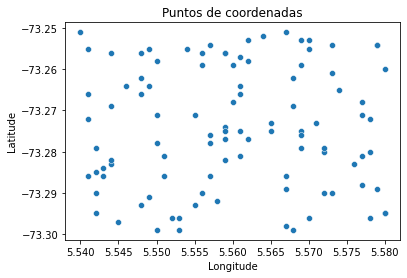

In [6]:
sns.scatterplot(data=xy, x='Lon', y='Lat')
plt.title('Puntos de coordenadas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

* Se logra observar que la distribución de los datos esta dispersa en todo el plano, ya que no hay concentración especifica de puntos.

3.Asignar al gráfico un tamaño al punto de acuerdo con el SMI

Text(0, 0.5, 'Latitude')

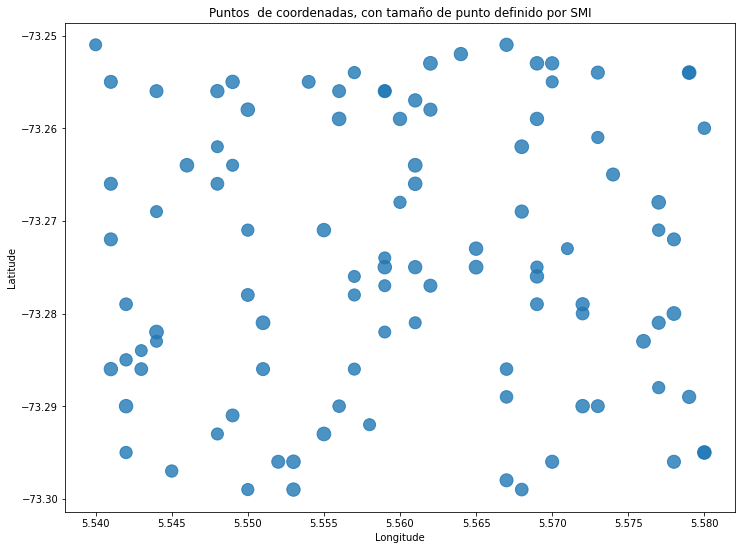

In [8]:
x = Longitude
y = Latitude
sizes = SMI*200
markers = LST
plt.figure(figsize=(12,9))
plt.scatter(x, y,s=sizes, alpha= 0.8,
            )
plt.title('Puntos  de coordenadas, con tamaño de punto definido por SMI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

4.Asignar al gráfico un color al punto de acuerdo con el NDVI

Text(0, 0.5, 'Latitude')

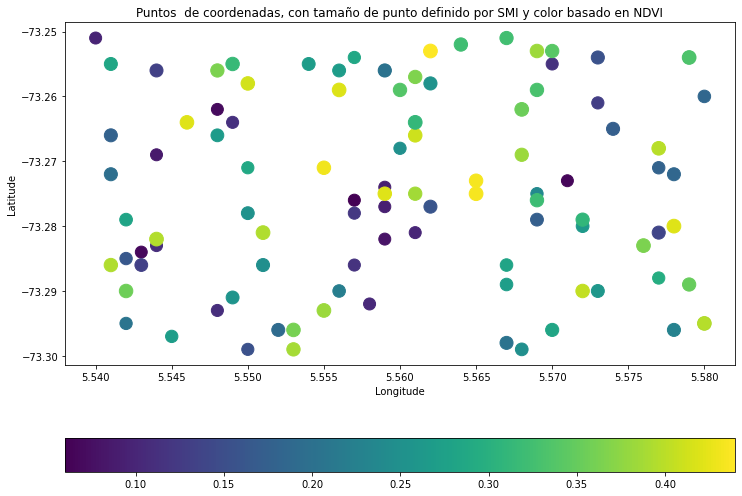

In [9]:
x = Longitude
y = Latitude
sizes = SMI*200
markers = LST 

colors = NDVI
plt.figure(figsize=(12,9))
plt.scatter(x, y,s=sizes, alpha= 1, c = colors
            )
plt.colorbar(orientation = "horizontal")
plt.title('Puntos  de coordenadas, con tamaño de punto definido por SMI y color basado en NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

* Segun el gráfico se logra evidenciar que el indice de vegetación de diferencia normalizado en la mayoria de puntos se encuentran entre 0.20µm y 0.30 µm, de lo cual se deduce que las zonas de estudio tienen vegetación escasa y/o pueden tener plantas medio sanas.

5.Asignar al gráfico una forma al punto de acuerdo con el LST

Text(0, 0.5, 'Latitude')

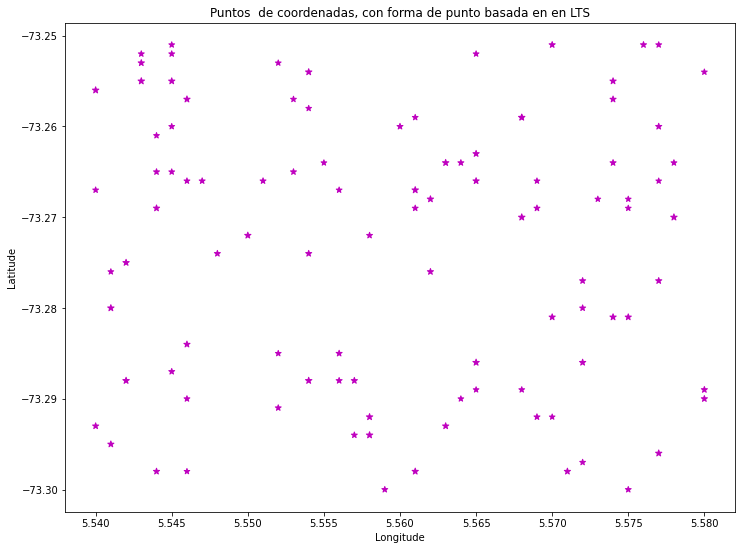

In [40]:
x = Longitude
y = Latitude
colors = NDVI
sizes = SMI*50
markers = LST
#NDVI1 = np.ma.masked_where(NDVI < 0.25, NDVI)
#NDVI2 = np.ma.masked_where(NDVI >=0.25, NDVI)
plt.figure(figsize=(12,9))
plt.scatter(x, y, c='m', s=sizes, marker = '*',
            )
plt.title('Puntos  de coordenadas, con forma de punto basada en en LTS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

* Se observa que el área ocupada por la estrella que representa la temperatura en la superficie del suelo, no es la misma que el indice de humedad del suelo.

6.Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar. 

In [24]:
Map = folium.Map(location = [5, -73],zoom_start = 6)
for i in range(len(xy['Lat'])):
    folium.Marker(
        location = [xy['Lon'][i],xy['Lat'][i]],
        popup = f'Lon: {xy["Lon"][i]}, Lat: {xy["Lat"][i]}',
        icon = folium.Icon()
    ).add_to(Map)
Map

* Segun las coordenadas obtenidas, logramos evidenciar que todos los puntos 
se encuentran ubicados en el departamento de Boyaca, Colombia.

7.Realice un boxplot para SMI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


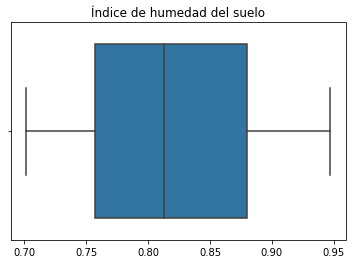

In [41]:
BoxSMI= sns.boxplot(SMI)

plt.title("Índice de humedad del suelo")
plt.show()




*   El indice de humedad del suelo tiene una mediana de 0.82 aproximadamente de cual se deduce que el 50% de los puntos tienen el indice de humedad igual o menor a 0.82.

8.Realice un histograma para NDVI

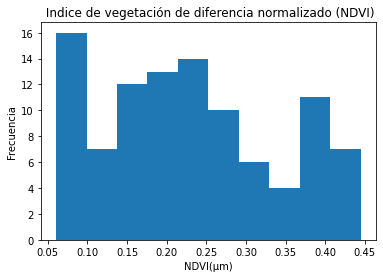

In [42]:
import matplotlib.pyplot as plt
NDVI
n, bins, patches=plt.hist(NDVI)
plt.xlabel("NDVI(µm)")
plt.ylabel("Frecuencia")
plt.title(" Indice de vegetación de diferencia normalizado (NDVI)")
plt.show()

* Se evidencia que en los puntos de las coordenadas de estudio, hay mayor cantidad de zonas con un indice de vegetación de diferencia normalizado de 0.25µm, por lo cual las zonas tienen vegetación escasa o las plantas no estan en optimas condicones.

9.Grafique la densidad para LST

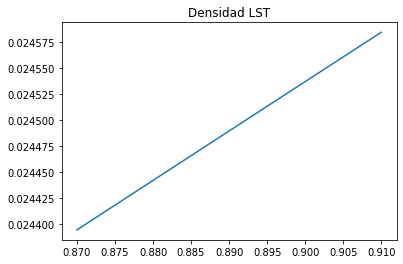

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
LST
density = kde.gaussian_kde(LST)
x = np.linspace(0.87,0.91,100)
y=density(x)

plt.plot(x, y)
plt.title("Densidad LST")
plt.show()

* Se observa un comportamiento lineal creciente, de lo cual se deduce que al disminuir la temperatura en la superficie del suelo aumenta la densidad, es decir, son inversamente proporcional.

10.Calcule estadísticas descriptivas para las 3 variables

In [44]:
from pandas.core.frame import DataFrame

XY2.describe()


,V1,V2,V3
count,100.000000,100.000000,100.000000
mean,0.817447,0.229945,12.553502
std,0.069924,0.112938,7.676642
min,0.701449,0.060608,0.004967
25%,0.756958,0.148926,6.759350
50%,0.812632,0.220185,11.696246
75%,0.879647,0.315085,19.179696
max,0.947089,0.444544,25.978635


* Para la tabla de estadística descriptiva V1:SMI, V2:NDVI y V3:LST, en la cual la media es 0.82, 0.25 y 11.35 respectivamente, se observa también que la temperatura en la superficie del suelo tiene la mayor desviación estandar, es decir, los datos correspondientes a esta categoria tienen mayor dispersión y el indice de humedad del suelo tiene una menor dispersión, por lo cual las zonas tienen valores similares respecto a este factor.

11.Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante


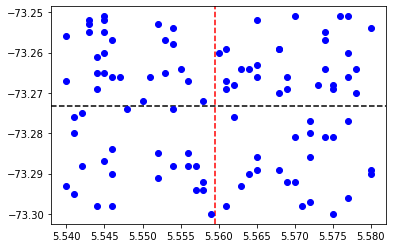

       Lat    Lon Factor       smi      ndvi        lst
0  -73.290  5.564     IV  0.716976  0.066846   0.315346
1  -73.298  5.546    III  0.701799  0.082223   0.274211
2  -73.268  5.573      I  0.724182  0.060792   0.731055
3  -73.289  5.565     IV  0.712895  0.083004   0.722442
4  -73.266  5.577      I  0.715477  0.060608   1.733995
..     ...    ...    ...       ...       ...        ...
95 -73.270  5.568      I  0.947089  0.367714   7.918799
96 -73.281  5.575     IV  0.854055  0.405474  18.955418
97 -73.286  5.565     IV  0.927888  0.272095  21.673277
98 -73.275  5.542    III  0.903401  0.440150  21.387387
99 -73.292  5.558    III  0.914319  0.312714   9.304626

[100 rows x 6 columns]


Lat                       ...        lst                      
       count       mean       std  ...        50%        75%        max
Factor                             ...                                 
I       29.0 -73.262172  0.006291  ...  10.208912  17.597684  25.929156
II      26.0 -73.260692  0.006590  ...   9.822481  15.719523  25.978635
III     23.0 -73.287696  0.007749  ...  12.561449  19.506843  24.857901
IV      22.0 -73.288091  0.007438  ...  14.233895  21.539447  25.953282

[4 rows x 40 columns]

In [45]:
Lonmedia = np.mean(xy ['Lon'])
Latmedia = np.mean( xy ['Lat'])
plt.axvline(x=Lonmedia, color="red", linestyle="--")
plt.axhline(y=Latmedia, color="black", linestyle="--")
plt.plot(xy['Lon'], xy['Lat'], 'bo')
plt.show()
conditions = [
    (xy['Lon'] > Lonmedia) & (xy['Lat'] > Latmedia),
    (xy['Lon'] < Lonmedia) & (xy['Lat'] > Latmedia),
    (xy['Lon'] < Lonmedia) & (xy['Lat'] < Latmedia),
    (xy['Lon'] > Lonmedia) & (xy['Lat'] < Latmedia)
    ]

fac = ['I', 'II', 'III', 'IV']

xy['Factor'] = np.select(conditions, fac)

xy['smi']= SMI
xy['ndvi']= NDVI
xy['lst']= LST

print(xy)

xy.groupby('Factor').describe()

 

12.Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico


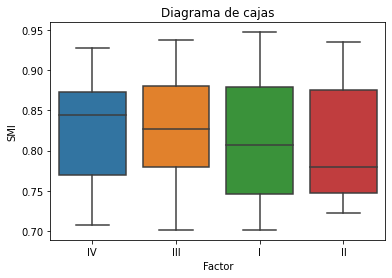

In [46]:
sns.boxplot(data=xy, x='Factor', y='smi')
plt.ylabel('SMI')
plt.xlabel('Factor')
plt.title('Diagrama de cajas')
plt.show()

* El cuadrante I tiene una mayor media respecto a los otros cuadrantes, siendo esta 0.84 aproximadamente, adicional en este cuadrante el 75% de los zonas tienen un indice de humedad del suelo por encima de 0.84; el cuadrante II tiene una media de 0.81 y además se evidencia que en este cuadrante las zonas tienen un indice de humedad más variados ya que el rango en el que se encuentran los datos estan entre 0.71 y 0.95.
El factor IV tiene una media de 0.82 y el cuadrante III tiene una media de 0.83.


13. Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)


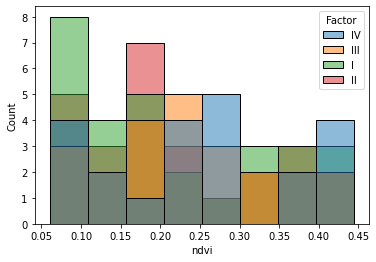

In [48]:
xy.groupby('Factor')
sns.histplot(data=xy,x="ndvi", hue="Factor")

* En el cuadrante I las zonas estudiadas tienen en su mayoria un NDVI de 0.8µm a 0.15µm y también predominan los valores de 0.3 a 0.35µm, respecto a cuadrante II predominan valores de NDVI entre 0.16 a 0.21µm; en cuanto al cuadrante II tiene predominancia entre 0.21 a 0.26µm y finalmente el cuadrante IV las zonas estudiadas tienen una NDVI  entre 0.26 a 0.30µm y entre 0.30 a 0.44µm. En conclusión en el cuadrante IV se encuentran zonas con mayor vegetación y mejor estado de la misma, sin embargo en la mayoria de zonas del cuadrante I tienen escasa vegetación o no se encuentra en buenas condiciones.

14. Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)


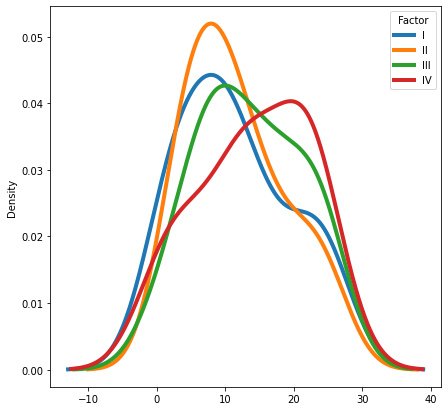

In [49]:
df1=xy.pivot(columns='Factor', values='lst') 

df1.plot.density(figsize = (7, 7), 
                       linewidth = 4) 

* El cuadrante I tiene una mayor densidad respecto a los otros cuadrantes y el cuadrante IV tiene una menor densidad; así que teniendo en cuenta el concepto de densidad se deduce que en el cuadrante I el suelo tiene una menor temperatura superficial y el cuadrante IV tiene una mayor temperatura superficial del suelo.

15.Construya una matriz de correlaciones de Pearson para las 5 variables

In [87]:
df2=pd.DataFrame({'Lat' : Latitude, 'Lon': Longitude,  'lst':LST ,'smi': SMI,'ndvi':NDVI })
df2.corr()
corr= df2.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,Lat,Lon,lst,smi,ndvi
Lat,1.000000,-0.012124,-0.072848,0.014792,-0.001285
Lon,-0.012124,1.000000,0.040040,0.132044,0.080631
lst,-0.072848,0.040040,1.000000,0.776314,0.911557
smi,0.014792,0.132044,0.776314,1.000000,0.804152
ndvi,-0.001285,0.080631,0.911557,0.804152,1.000000


* Se observa que en cuanto a la latitud y longitud respecto a las 3 variables evaluadas,  hay alta variabilidad ya que los valores son bajos. En contraposición entre las variables evaluadas, no hay mucha variabilidad ya que los valores son altos, por lo cual se infiere que no hay buena dispersión.

16.Realice un gráfico de correlaciones para las 5 variables


In [67]:
pd.plotting.scatter_matrix(df2)
sns.regplot(x=df2["Lon"], y=df2["Lat"], line_kws={"color":"m","alpha":0.7,"lw":5})

NameError: ignored

17.Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico

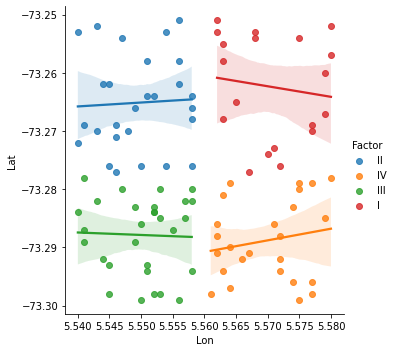

In [89]:
sns.lmplot(x="Lon", y="Lat", hue="Factor", data=xy)

18.Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST


In [90]:
import statsmodels.api as sm
from statsmodels.api import add_constant
y = xy['ndvi'] # variable dependiente
x = xy['lst'] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary) 

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     481.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.32e-39
Time:                        16:42:51   Log-Likelihood:                 171.01
No. Observations:                 100   AIC:                            -338.0
Df Residuals:                      98   BIC:                            -332.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0941      0.008     11.262      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



19.Ajuste un modelo de regresión multiple entre NDVI (respuesta) con  LST y SMI


In [91]:
y = xy['ndvi'] # variable dependiente
x = xy[{'lst',"smi"}] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     284.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.61e-41
Time:                        16:42:57   Log-Likelihood:                 178.47
No. Observations:                 100   AIC:                            -350.9
Df Residuals:                      97   BIC:                            -343.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1843      0.071     -2.599      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



20.Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.


In [92]:

muestra_xy = xy.sample(80)
print(muestra_xy )
muestra_xy.corr()
mc= muestra_xy.corr ()
mc.style.background_gradient (cmap = 'coolwarm')

       Lat    Lon Factor       smi      ndvi        lst
26 -73.251  5.556     II  0.777145  0.197300   6.873996
65 -73.283  5.549    III  0.838593  0.352619  21.529169
70 -73.251  5.562      I  0.909022  0.430937  18.666585
52 -73.276  5.572      I  0.907340  0.262475  11.580142
83 -73.253  5.568      I  0.919468  0.422176  19.083997
..     ...    ...    ...       ...       ...        ...
20 -73.270  5.543     II  0.758770  0.151260   2.632296
86 -73.298  5.545    III  0.906751  0.401316  19.713679
96 -73.293  5.551    III  0.948020  0.299736  17.762979
31 -73.269  5.577      I  0.769182  0.177733   6.737404
10 -73.288  5.572     IV  0.740823  0.110699   1.761939

[80 rows x 6 columns]


,Lat,Lon,smi,ndvi,lst
Lat,1.000000,-0.104455,0.083310,0.103283,0.016945
Lon,-0.104455,1.000000,0.205967,0.102389,0.093647
smi,0.083310,0.205967,1.000000,0.810308,0.778857
ndvi,0.103283,0.102389,0.810308,1.000000,0.910128
lst,0.016945,0.093647,0.778857,0.910128,1.000000


* Se logra observar que estas correlaciones tienen un comportamiento similar al anterior analisis donde la variabilidad entre SMI, NDVI y LST es baja y la variabilidad entre Longitude y Latitude respecto a SMI, DNVI y LST tienen alta variabilidad.

21. Haga un gráfico 3D para las 3 variables ambientales

In [93]:
import plotly.express as px
f = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst')
  
f.show()

*  En este gráfico se logra corroborar el anterior estudio de correlación, ya que se observa que los valores de los 3 factores ambientales se encuentra agrupados, loq ue determina poca variabilidad y dispersión.

22. Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante

In [94]:
fig = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst',
                    color = 'Factor')
  
fig.show()

23.Investigue como se construye una matriz de distancias entre todos las coordenadas


In [95]:
import pandas as pd
from scipy.spatial import distance_matrix
m = np.stack([xy['Lon'],xy['Lat']], axis=1)
mm=distance_matrix(m, m)
print(mm)

[[0.         0.004      0.01720465 ... 0.01077033 0.01044031 0.01252996]
 [0.004      0.         0.01979899 ... 0.01       0.01431782 0.00921954]
 [0.01720465 0.01979899 0.         ... 0.01456022 0.011      0.02247221]
 ...
 [0.01077033 0.01       0.01456022 ... 0.         0.01565248 0.00806226]
 [0.01044031 0.01431782 0.011      ... 0.01565248 0.         0.0212132 ]
 [0.01252996 0.00921954 0.02247221 ... 0.00806226 0.0212132  0.        ]]


24. Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias

(5.558770000000005, -73.27712999999989)


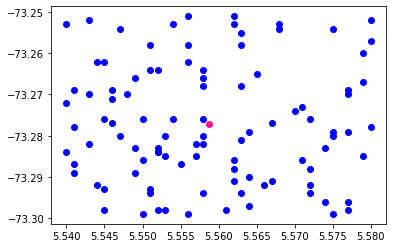

In [96]:
data= np.array(m)
def centroid(array):
  length=array.shape[0]
  sum_x =np.sum(array[:,0])
  sum_y =np.sum(array[:,1])
  return sum_x /length ,sum_y/length

centroide= centroid(data)
print(centroide)
plt.plot(xy['Lon'],xy['Lat'],'bo')
plt.scatter(centroide[0],centroide[1],c="deeppink")

25.Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana
